# Libraries

In [83]:
from logging import warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from keras.models import load_model

# Loading dataset

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


# Q1) What is the correlation between stalk shape and mushroom toxicity (class)?

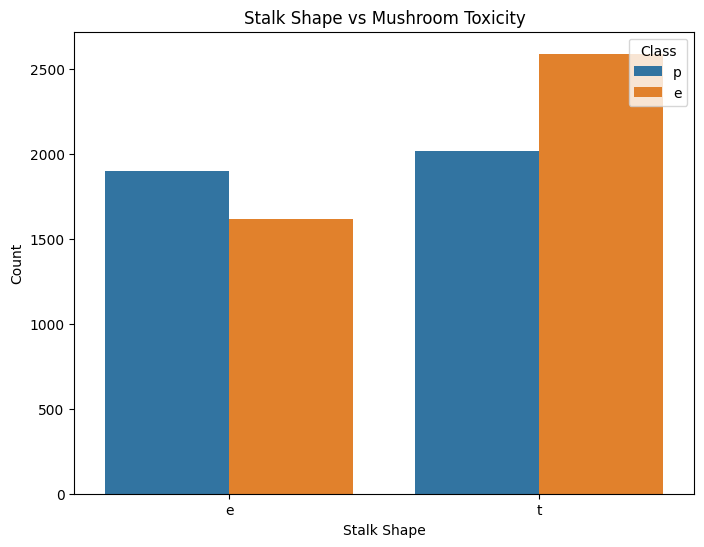

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stalk-shape', hue='class', data=df)
plt.title('Stalk Shape vs Mushroom Toxicity')
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

# stalk-shape: e = enlarging, t = tapering

# Q2) How does cap color vary across different mushroom habitats?

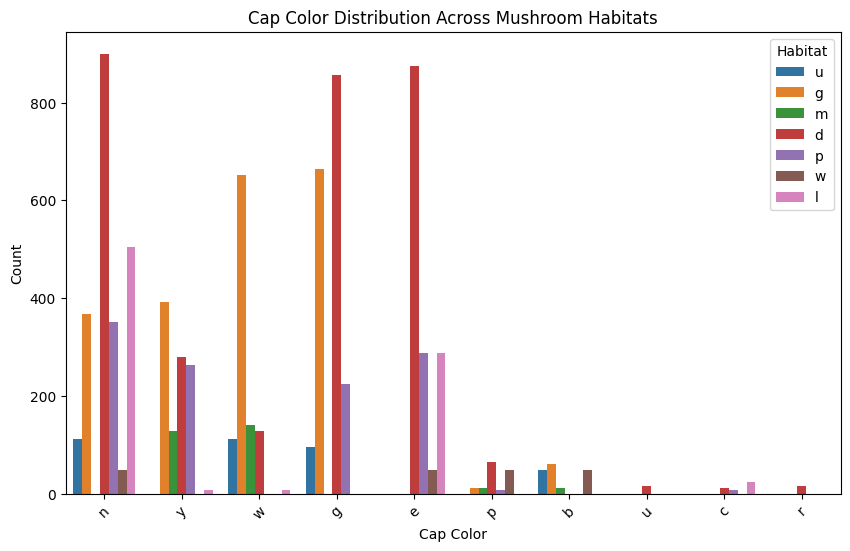

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-color', hue='habitat', data=df)
plt.title('Cap Color Distribution Across Mushroom Habitats')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Habitat', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# habitat: g=grasses, l=leaves, m=meadows, p=paths, w=waste, d=woods
# cap_color: n=brown, b=buff, c=cinnamon, g=gray, r=green, p=pink, u=purple, e=red, w=white, y=yellow

# Q3) Do mushrooms with bruises have a higher likelihood of being poisonous?

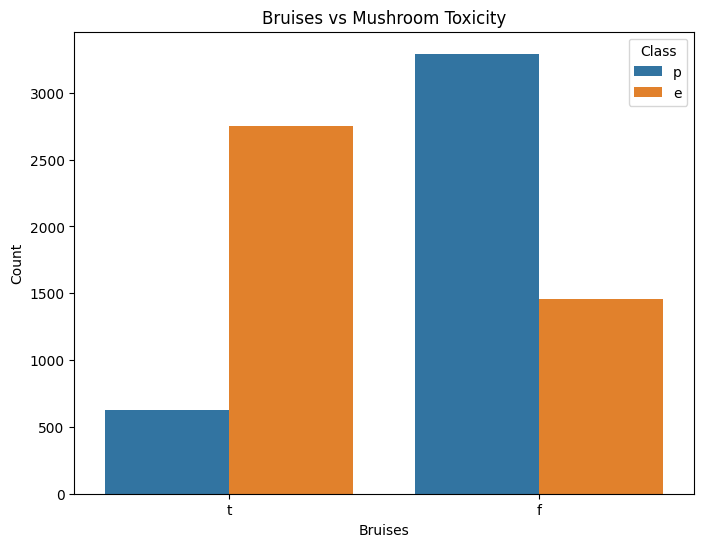

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='bruises', hue='class', data=df)
plt.title('Bruises vs Mushroom Toxicity')
plt.xlabel('Bruises')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

# bruises: t=true (bruised), f=false (not bruised)

# Q4) What are the most common combinations of gill spacing and gill size for edible mushrooms?

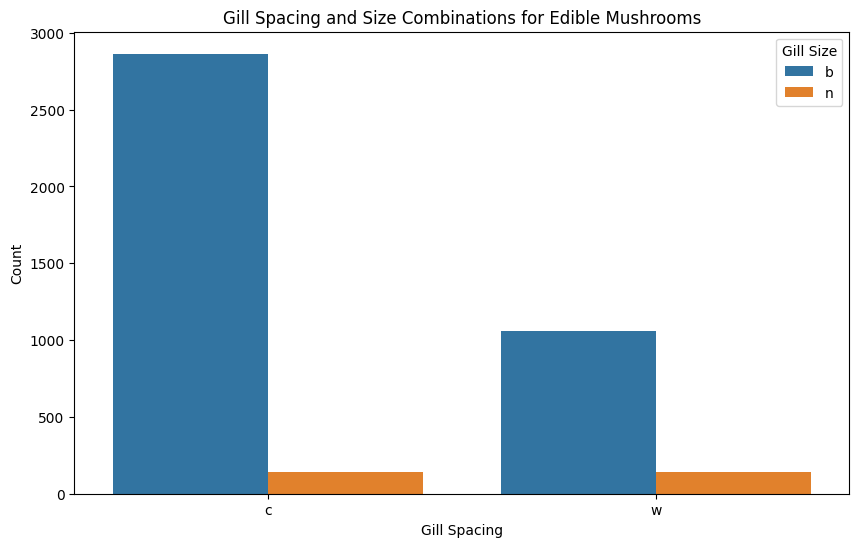

In [ ]:
edible_mushrooms = df[df['class'] == 'e']

plt.figure(figsize=(10, 6))
sns.countplot(x='gill-spacing', hue='gill-size', data=edible_mushrooms)
plt.title('Gill Spacing and Size Combinations for Edible Mushrooms')
plt.xlabel('Gill Spacing')
plt.ylabel('Count')
plt.legend(title='Gill Size', loc='upper right')
plt.show()

#gill_spacing: c=close, w=crowded, d=distant
# gill_size: b=broad, n=narrow

# Q5) Which cap shape is the most common?

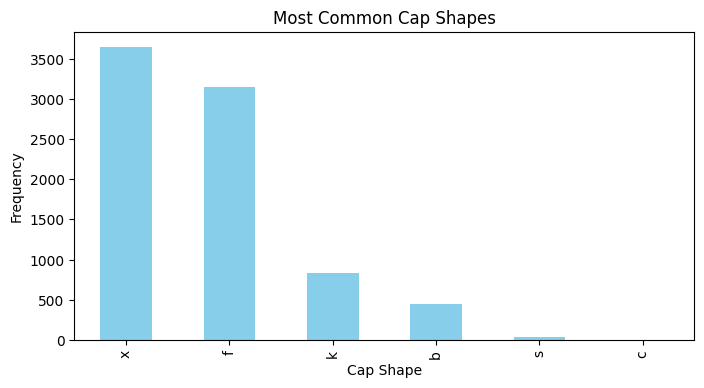

In [ ]:
plt.figure(figsize=(8, 4))
df['cap-shape'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Frequency')
plt.show()

# cap_shape: b=bell, x=convex, f=flat, s=sunken, k=knobbed, c=conical

# Q6) Top odor types associated with poisonous mushrooms

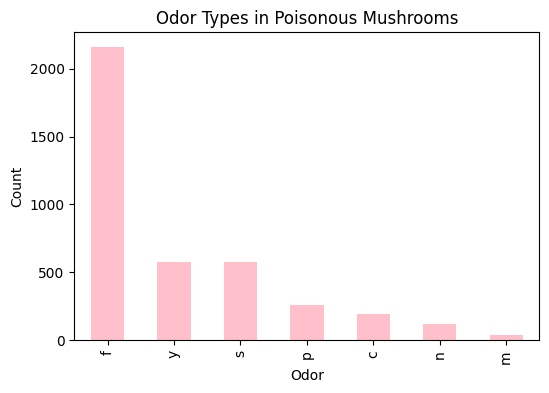

In [ ]:
poisonous_odors = df[df['class'] == 'p']['odor'].value_counts()
plt.figure(figsize=(6, 4))
poisonous_odors.plot(kind='bar', color='pink')
plt.title('Odor Types in Poisonous Mushrooms')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

# odor a=almond, l=anise, c=creosote, y=fishy, f=foul, m=musty, n=none, p=pungent, s=spicy

# Q7) Does gill color affect toxicity?

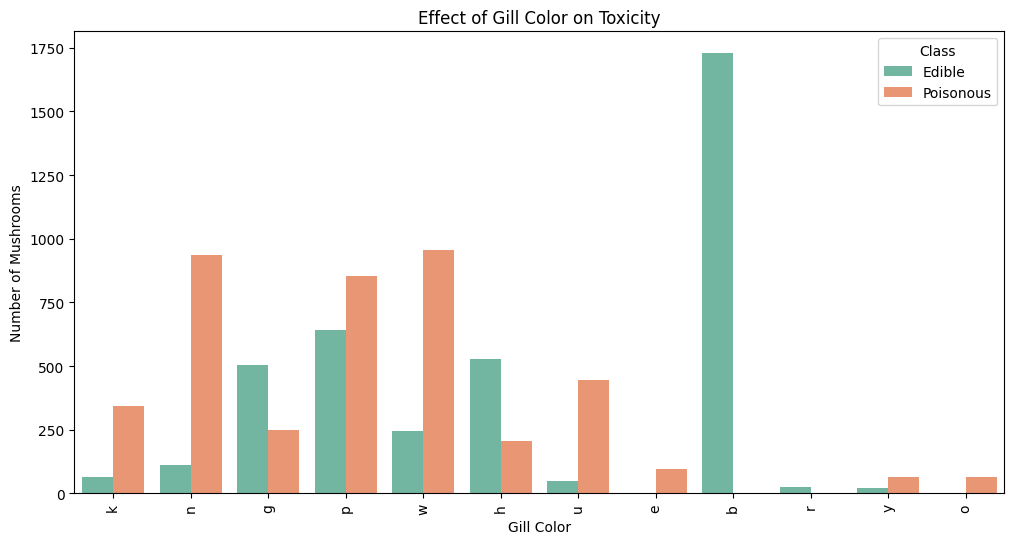

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gill-color', hue='class', palette='Set2')
plt.title('Effect of Gill Color on Toxicity')
plt.xlabel('Gill Color')
plt.ylabel('Number of Mushrooms')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=90)
plt.show()

# gill_color: k=black, b=buff, h=chocolate, g=grey. r=green, o=orange, p=pink, u=purple, e=red, w=white, y=yellow

# Q8) Do poisonous mushrooms frequently have rings?

<ipython-input-16-8a710f8bebb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['class'] == 'p'], x='ring-type', palette='Set2')


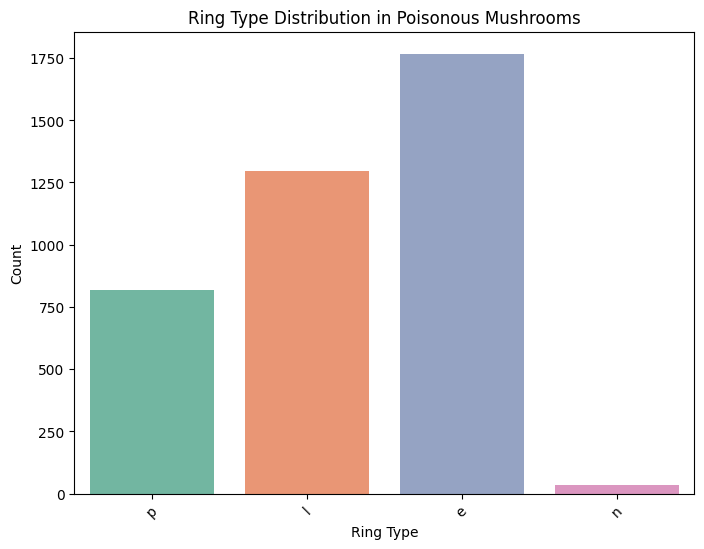

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['class'] == 'p'], x='ring-type', palette='Set2')
plt.title('Ring Type Distribution in Poisonous Mushrooms')
plt.xlabel('Ring Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# ring_type: c=cobwebby, e=evanescent, f=flaring, l=large, n=none, p=pendant, s=sheathing, z=zone

# Splitting

In [10]:
x = df.drop(['class'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, stratify=y)

# Encoding

In [11]:
ord_enc = OrdinalEncoder()
label_enc = LabelEncoder()

In [12]:
x_train = ord_enc.fit_transform(x_train)
x_test = ord_enc.transform(x_test)

y_train = label_enc.fit_transform(y_train)
y_test = label_enc.transform(y_test)

In [13]:
x_train

array([[2., 3., 8., ..., 2., 4., 1.],
       [2., 0., 3., ..., 2., 5., 0.],
       [2., 3., 2., ..., 3., 4., 0.],
       ...,
       [2., 2., 2., ..., 7., 4., 2.],
       [5., 2., 5., ..., 3., 3., 0.],
       [2., 0., 9., ..., 3., 4., 0.]])

In [14]:
x_test

array([[2., 3., 9., ..., 1., 5., 1.],
       [2., 2., 3., ..., 2., 0., 1.],
       [2., 0., 3., ..., 1., 5., 4.],
       ...,
       [5., 2., 4., ..., 2., 0., 1.],
       [5., 2., 9., ..., 3., 3., 3.],
       [5., 3., 3., ..., 1., 4., 4.]])

In [15]:
y_train

array([1, 0, 0, ..., 1, 1, 0])

In [16]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

#Classification Models

##1) Logistic Regression Model

In [19]:
# Hyperparameter Optimization for Logistic Regression
parameters_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],       # Optimization solvers
    'max_iter': [100, 200, 500]                     # Max iterations
}

# Initialize the model
clf_lr = LogisticRegression()

# Run the grid search
grid_obj_lr = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='accuracy', verbose=1)
grid_obj_lr = grid_obj_lr.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf_lr = grid_obj_lr.best_estimator_

# Train the model using the training sets
clf_lr.fit(x_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


LogisticRegression(C=100, max_iter=200, penalty='l1', solver='liblinear')

In [20]:
# Make predictions
y_pred_lr = clf_lr.predict(x_test)

In [117]:
def calculate_roc_auc(model, X_test, y_test):
    try:
        # Some classifiers may not support predict_proba
        if hasattr(model, 'predict_proba'):
            # Get predicted probabilities
            y_prob = model.predict_proba(X_test)[:, 1]  # For binary classification, take the probabilities for the positive class
            return round(roc_auc_score(y_test, y_prob) * 100, 2)
        else:
            return 'Not available'
    except Exception as e:
        print(f"Error in ROC-AUC calculation: {e}")
        return 'Not available'

In [118]:
# Calculate accuracy
acc_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
prec_lr = round(precision_score(y_test, y_pred_lr) * 100, 2)
rec_lr = round(recall_score(y_test, y_pred_lr) * 100, 2)
f1_lr = round(f1_score(y_test, y_pred_lr) * 100, 2)
roc_auc_lr = calculate_roc_auc(clf_lr, x_test, y_test)

print(f'Accuracy of Logistic Regression model: {acc_lr}%')
print(f'Precision of Logistic Regression model: {prec_lr}%')
print(f'Recall of Logistic Regression model: {rec_lr}%')
print(f'F1-score of Logistic Regression model: {f1_lr}%')
if roc_auc_lr is not None:
    print(f'ROC-AUC of Logistic Regression model: {roc_auc_lr}%')
else:
    print('ROC-AUC: Not available for this model')



Accuracy of Logistic Regression model: 96.55%
Precision of Logistic Regression model: 96.78%
Recall of Logistic Regression model: 96.04%
F1-score of Logistic Regression model: 96.41%
ROC-AUC of Logistic Regression model: 98.51%


In [107]:
# Display the best parameters
print("Best Parameters for Logistic Regression: ", grid_obj_lr.best_params_)

Best Parameters for Logistic Regression:  {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


###Normal Logistic Regression

In [19]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  94.34


##2) Decision Tree Model

In [23]:
# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

In [24]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='log2')

In [104]:
y_pred_dt = clf.predict(x_test)

In [119]:
acc_dt = round( metrics.accuracy_score(y_test, y_pred_dt) * 100, 2 )
prec_dt = round(precision_score(y_test, y_pred_dt) * 100, 2)
rec_dt = round(recall_score(y_test, y_pred_dt) * 100, 2)
f1_dt = round(f1_score(y_test, y_pred_dt) * 100, 2)
roc_auc_dt = calculate_roc_auc(clf, x_test, y_test)

print(f'Accuracy of Decision Tree model: {acc_dt}%')
print(f'Precision of Decision Tree model: {prec_dt}%')
print(f'Recall of Decision Tree model: {rec_dt}%')
print(f'F1-score of Decision Tree model: {f1_dt}%')
if roc_auc_dt is not None:
    print(f'ROC-AUC of Decision Tree model: {roc_auc_dt}%')
else:
    print('ROC-AUC: Not available for this model')

Accuracy of Decision Tree model: 100.0%
Precision of Decision Tree model: 100.0%
Recall of Decision Tree model: 100.0%
F1-score of Decision Tree model: 100.0%
ROC-AUC of Decision Tree model: 100.0%


In [81]:
# Display the best parameters
print("Best Parameters for Decision Tree: ", grid_obj.best_params_)

Best Parameters for Decision Tree:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


##3) Random Forest Model

In [28]:
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=4)

In [102]:
y_pred_rf = rf.predict(x_test)

In [120]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred_rf) * 100 , 2 )
prec_rf = round(precision_score(y_test, y_pred_rf) * 100, 2)
rec_rf = round(recall_score(y_test, y_pred_rf) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred_rf) * 100, 2)
roc_auc_rf = calculate_roc_auc(rf, x_test, y_test)

print(f'Accuracy of Random Forest model: {acc_rf}%')
print(f'Precision of Random Forest model: {prec_rf}%')
print(f'Recall of Random Forest model: {rec_rf}%')
print(f'F1-score of Random Forest model: {f1_rf}%')
if roc_auc_rf is not None:
    print(f'ROC-AUC of Random Forest model: {roc_auc_rf}%')
else:
    print('ROC-AUC: Not available for this model')

Accuracy of Random Forest model: 100.0%
Precision of Random Forest model: 100.0%
Recall of Random Forest model: 100.0%
F1-score of Random Forest model: 100.0%
ROC-AUC of Random Forest model: 100.0%


In [80]:
# Display the best parameters
print("Best Parameters for Random Forest: ", grid_obj.best_params_)

Best Parameters for Random Forest:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


##4) Support Vector Machine Model

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [33]:
# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets
svc.fit(x_train,y_train)

SVC(C=1000, gamma=0.001)

In [100]:
# Prediction on test data
y_pred_svm = svc.predict(x_test)

In [121]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred_svm) * 100, 2 )
prec_svm = round(precision_score(y_test, y_pred_svm) * 100, 2)
rec_svm = round(recall_score(y_test, y_pred_svm) * 100, 2)
f1_svm = round(f1_score(y_test, y_pred_svm) * 100, 2)
roc_auc_svm = calculate_roc_auc(svc, x_test, y_test)

print(f'Accuracy of Support Vector Machine model: {acc_rf}%')
print(f'Precision of Support Vector Machine model: {prec_rf}%')
print(f'Recall of Support Vector Machine model: {rec_rf}%')
print(f'F1-score of Support Vector Machine model: {f1_rf}%')
if roc_auc_svm is not None:
    print(f'ROC-AUC of Support Vector Machine model: {roc_auc_rf}%')
else:
    print('ROC-AUC: Not available for this model')

Accuracy of Support Vector Machine model: 100.0%
Precision of Support Vector Machine model: 100.0%
Recall of Support Vector Machine model: 100.0%
F1-score of Support Vector Machine model: 100.0%
ROC-AUC of Support Vector Machine model: 100.0%


In [79]:
# Display the best parameters
print("Best Parameters for Support Vector Machine: ", grid_obj.best_params_)

Best Parameters for Support Vector Machine:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


##5) K-Nearest Neighbors Model

In [37]:
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='distance')

In [98]:
y_pred_knn = knn.predict(x_test)

In [122]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred_knn) * 100, 2 )
prec_knn = round(precision_score(y_test, y_pred_knn) * 100, 2)
rec_knn = round(recall_score(y_test, y_pred_knn) * 100, 2)
f1_knn = round(f1_score(y_test, y_pred_knn) * 100, 2)
roc_auc_knn = calculate_roc_auc(knn, x_test, y_test)

print(f'Accuracy of K-Nearest Neighbors model: {acc_rf}%')
print(f'Precision of K-Nearest Neighbors model: {prec_rf}%')
print(f'Recall of K-Nearest Neighbors model: {rec_rf}%')
print(f'F1-score of K-Nearest Neighbors model: {f1_rf}%')
if roc_auc_knn is not None:
    print(f'ROC-AUC of K-Nearest Neighbors model: {roc_auc_rf}%')
else:
    print('ROC-AUC: Not available for this model')

Accuracy of K-Nearest Neighbors model: 100.0%
Precision of K-Nearest Neighbors model: 100.0%
Recall of K-Nearest Neighbors model: 100.0%
F1-score of K-Nearest Neighbors model: 100.0%
ROC-AUC of K-Nearest Neighbors model: 100.0%


In [78]:
# Display the best parameters
print("Best Parameters for K-Nearest Neighbors: ", grid_obj.best_params_)

Best Parameters for K-Nearest Neighbors:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


##6) Gaussian Naive Bayes Model


In [41]:
# Hyperparameter Optimization for Gaussian Naive Bayes
parameters_gnb = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Smoothing parameter
}

# Initialize the model
clf_gnb = GaussianNB()

# Run the grid search
grid_obj_gnb = GridSearchCV(clf_gnb, parameters_gnb, cv=5, scoring='accuracy', verbose=1)
grid_obj_gnb = grid_obj_gnb.fit(X_train_scaled, y_train)

# Set the clf to the best combination of parameters
clf_gnb = grid_obj_gnb.best_estimator_

# Train the model using the training sets
clf_gnb.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GaussianNB(var_smoothing=0.1)

In [96]:
# Make predictions
y_pred_gnb = clf_gnb.predict(x_test)


In [123]:
# Calculate accuracy
acc_gnb = round(accuracy_score(y_test, y_pred_gnb) * 100, 2)
prec_gnb = round(precision_score(y_test, y_pred_gnb) * 100, 2)
rec_gnb = round(recall_score(y_test, y_pred_gnb) * 100, 2)
f1_gnb = round(f1_score(y_test, y_pred_gnb) * 100, 2)
roc_auc_gnb = calculate_roc_auc(clf_gnb, x_test, y_test)

print(f'Accuracy of Gaussian Naive Bayes model: {acc_rf}%')
print(f'Precision of Gaussian Naive Bayes model: {prec_rf}%')
print(f'Recall of Gaussian Naive Bayes model: {rec_rf}%')
print(f'F1-score of Gaussian Naive Bayes model: {f1_rf}%')
if roc_auc_gnb is not None:
    print(f'ROC-AUC of Gaussian Naive Bayes model: {roc_auc_rf}%')
else:
    print('ROC-AUC: Not available for this model')

Accuracy of Gaussian Naive Bayes model: 100.0%
Precision of Gaussian Naive Bayes model: 100.0%
Recall of Gaussian Naive Bayes model: 100.0%
F1-score of Gaussian Naive Bayes model: 100.0%
ROC-AUC of Gaussian Naive Bayes model: 100.0%


In [94]:
# Display the best parameters
print("Best Parameters for Gaussian Naive Bayes: ", grid_obj_gnb.best_params_)

Best Parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.1}


##Normal Gaussian Naive Bias

In [45]:
# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

GaussianNB()

In [46]:
y_pred = model.predict(x_test)

In [47]:
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  91.38


###Models Comparison

In [124]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn, acc_gnb],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_svm, prec_knn, prec_gnb],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_svm, rec_knn, rec_gnb],
    'F1-score': [f1_lr, f1_dt, f1_rf, f1_svm, f1_knn, f1_gnb],
    'ROC-AUC': [roc_auc_lr if roc_auc_lr is not None else 'Not available',
                roc_auc_dt if roc_auc_dt is not None else 'Not available',
                roc_auc_rf if roc_auc_rf is not None else 'Not available',
                roc_auc_svm if roc_auc_svm is not None else 'Not available',
                roc_auc_knn if roc_auc_knn is not None else 'Not available',
                roc_auc_gnb if roc_auc_gnb is not None else 'Not available']})

print('Model Comparison:\n', model_comparison)

Model Comparison:
                     Model  Accuracy  Precision  Recall  F1-score  \
0     Logistic Regression     96.55      96.78   96.04     96.41   
1           Decision Tree    100.00     100.00  100.00    100.00   
2           Random Forest    100.00     100.00  100.00    100.00   
3  Support Vector Machine    100.00     100.00  100.00    100.00   
4     K-Nearest Neighbors    100.00     100.00  100.00    100.00   
5    Gaussian Naive Bayes     84.37      88.73   77.39     82.67   

         ROC-AUC  
0          98.51  
1          100.0  
2          100.0  
3  Not available  
4          100.0  
5          90.29  


In [131]:
model_values = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'],
    'Accuracy': [96.55, 100.00, 100.00, 100.00, 100.00, 84.37],
    'Precision': [96.78, 100.00, 100.00, 100.00, 100.00, 88.73],
    'Recall': [96.04, 100.00, 100.00, 100.00, 100.00, 77.39],
    'F1-score': [96.41, 100.00, 100.00, 100.00, 100.00, 82.67],
    'ROC-AUC': [98.51, 100.00, 100.00, np.nan, 100.00, 90.29]  # np.nan for SVM as it doesn't have ROC-AUC
})

print('Model Vlues:\n', model_values)

Model Vlues:
                     Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0     Logistic Regression     96.55      96.78   96.04     96.41    98.51
1           Decision Tree    100.00     100.00  100.00    100.00   100.00
2           Random Forest    100.00     100.00  100.00    100.00   100.00
3  Support Vector Machine    100.00     100.00  100.00    100.00      NaN
4     K-Nearest Neighbors    100.00     100.00  100.00    100.00   100.00
5    Gaussian Naive Bayes     84.37      88.73   77.39     82.67    90.29


<Figure size 1200x800 with 0 Axes>

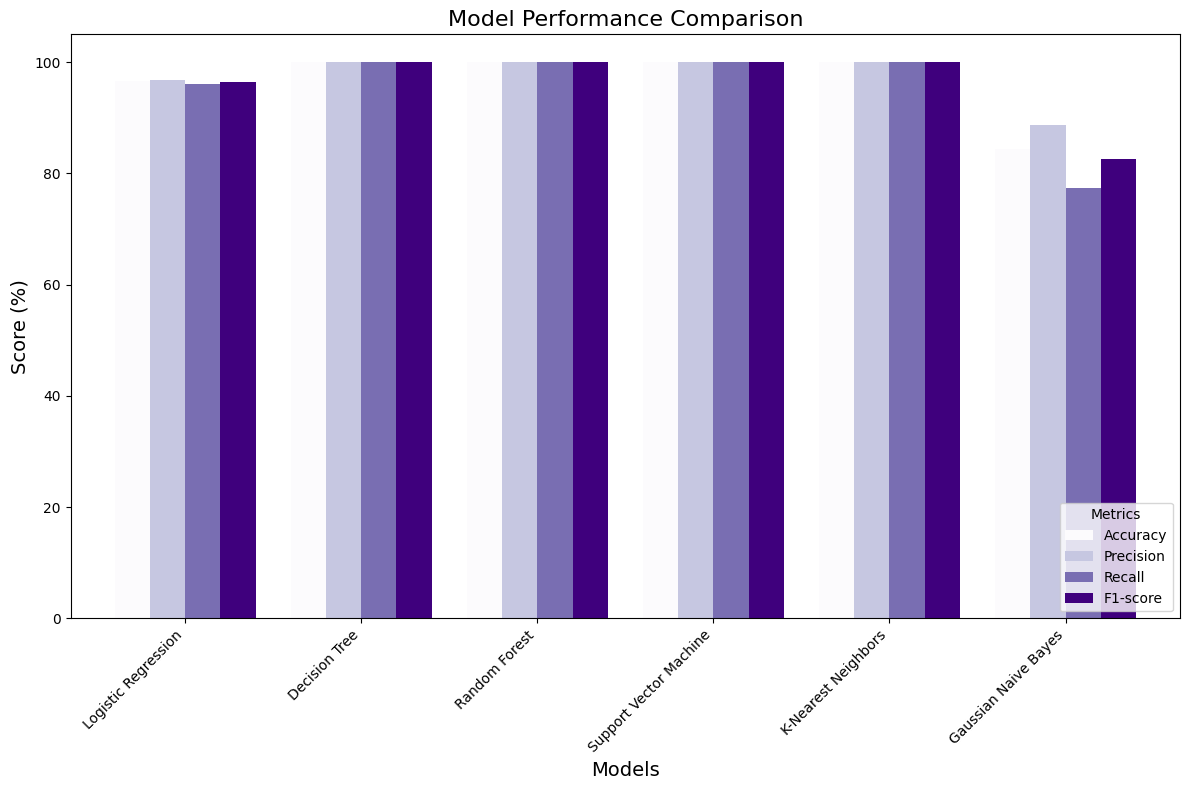

In [130]:
# Data for model comparison
model_comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn, acc_gnb],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_svm, prec_knn, prec_gnb],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_svm, rec_knn, rec_gnb],
    'F1-score': [f1_lr, f1_dt, f1_rf, f1_svm, f1_knn, f1_gnb],
    'ROC-AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_svm, roc_auc_knn, roc_auc_gnb]
}

# Convert the dictionary to a DataFrame for easy plotting
comparison_df = pd.DataFrame(model_comparison)

# Set up the plot
plt.figure(figsize=(12, 8))
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8), width=0.8, cmap="Purples")

# Customize plot
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics", loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Show the plot
plt.tight_layout()
plt.show()

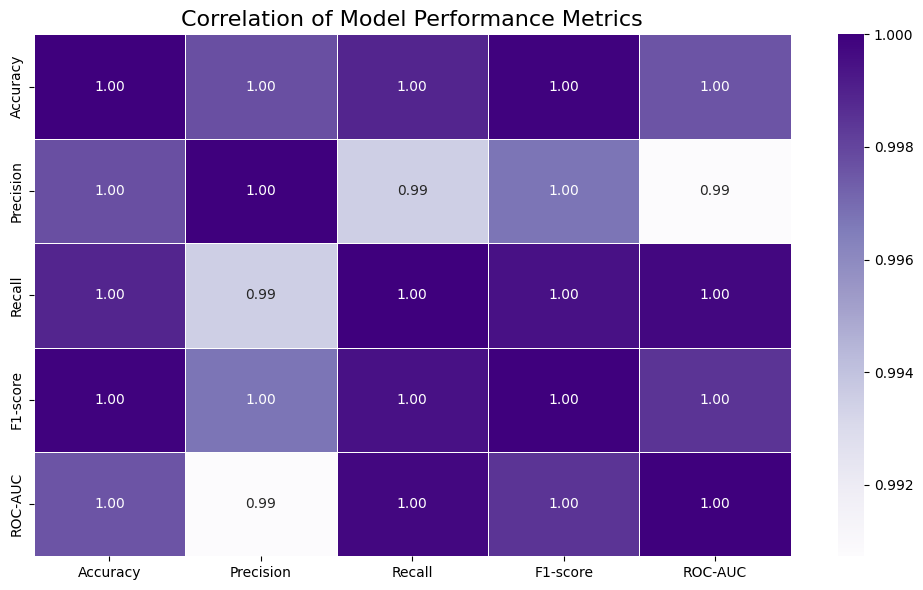

In [139]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

metric_values = model_values[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].values


# Convert the list into a DataFrame for easy plotting
metrics_df = pd.DataFrame(metric_values, columns=metrics, index=['Logistic Regression', 'Decision Tree',
                                                                 'Random Forest', 'Support Vector Machine',
                                                                 'K-Nearest Neighbors', 'Gaussian Naive Bayes'])

# Create the heatmap with pink colormap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.dropna().corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title('Correlation of Model Performance Metrics', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Building Neural Network

In [48]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(
        units = hp.Int('units_layer1', min_value=32, max_value=128, step=16),
        activation = 'relu',
        input_shape = (x_train.shape[1],)
    ))

    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(
        units = hp.Int('units_layer2', min_value=32, max_value=128, step=16),
        activation = 'relu'
    ))

    # Third hidden layer
    model.add(Dense(
        units = hp.Int('units_layer3', min_value=32, max_value=128, step=16),
        activation = 'relu'
    ))

    model.add(Dropout(0.3))

    # Fourth hidden layer
    model.add(Dense(
        units = hp.Int('units_layer4', min_value=32, max_value=128, step=16),
        activation = 'relu'
    ))

    # Fifth hidden layer
    model.add(Dense(
        units = hp.Int('units_layer5', min_value=32, max_value=128, step=16),
        activation = 'relu'
    ))

    # Output layer
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Tuner

In [49]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='mushroom'
)

In [50]:
tuner.search(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.9992307424545288

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 08s


In [51]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
- Units in each layer: {[best_hps.get(f'units_layer{i}') for i in range(1, 6)]}
- Learning rate: {best_hps.get('learning_rate')}
""")


Best hyperparameters:
- Units in each layer: [128, 48, 64, 96, 48]
- Learning rate: 0.001



# Training the best model

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('mushroom.keras', monitor='val_loss', save_best_only=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7278 - loss: 0.5241 - val_accuracy: 0.9308 - val_loss: 0.1825 - learning_rate: 0.0010
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9145 - loss: 0.2125 - val_accuracy: 0.9738 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9618 - loss: 0.0994 - val_accuracy: 0.9885 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0758 - val_accuracy: 0.9938 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0544 - val_accuracy: 0.9985 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0391 - val_accuracy: 0.9915 - val_loss: 0.0155 - learning_rate: 0.0010
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9927 - loss: 0.0249 - 

# Prediction

In [53]:
model = load_model('mushroom.keras')

In [54]:
test_predictions=model.predict(x_test)
test_predictions[:5]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.0000000e+00],
       [1.7235858e-15],
       [1.0000000e+00],
       [2.2882359e-06],
       [9.0922981e-12]], dtype=float32)

In [55]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4546e-05
Test Loss: 0.0000
Test Accuracy: 1.0000


In [56]:
y_pred = (test_predictions > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[842   0]
 [  0 783]]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Evaluating

In [58]:
loss, accuracy = best_model.evaluate(x_test, y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.5185e-05


In [59]:
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0000
Test Accuracy: 1.0000


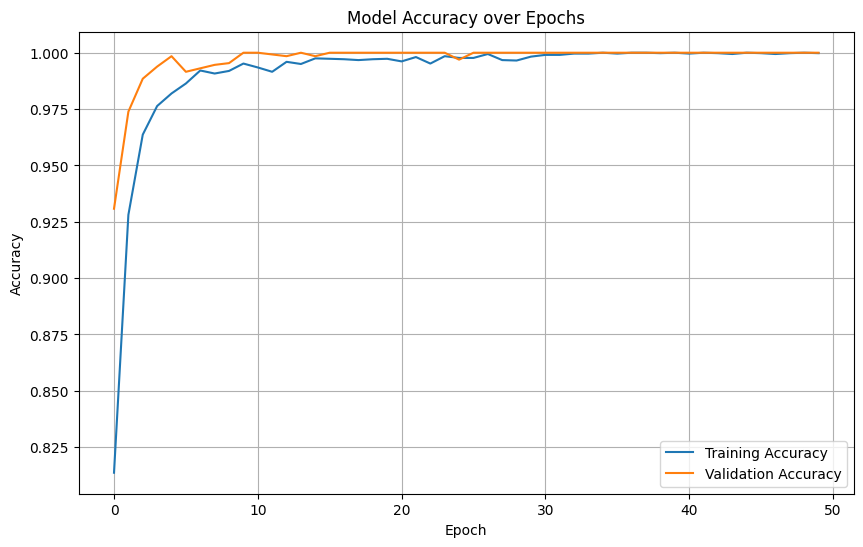

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

##Evaluating the models

In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'K-Nearest Neighbors', 'Gaussian Naive Bias'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn, acc_gnb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,100.00
2,Random Forest,100.00
3,Support Vector Machines,100.00
4,K-Nearest Neighbors,100.00
0,Logistic Regression,96.55
5,Gaussian Naive Bias,84.37


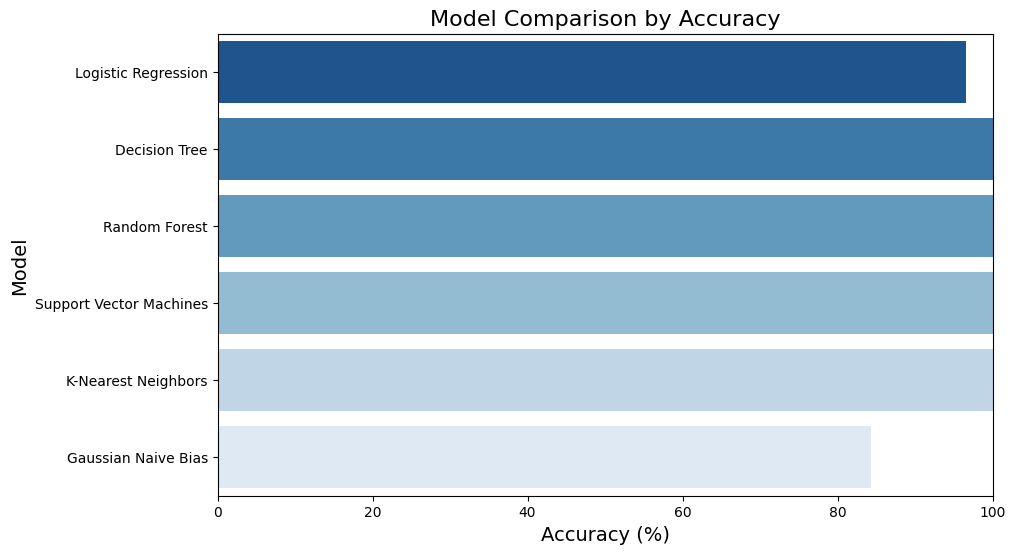

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models, palette='Blues_r')
plt.title('Model Comparison by Accuracy', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 100)  # Accuracy ranges from 0 to 100
plt.show()